In [2]:
import pandas as pd
# we can read the data directly from raw github link
# we are also defining the name of the columns.
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
print(df.head())
df.drop([0], inplace = True) # Removing the first row (unwanted)
df.head()

   age  operation_Year  axil_nodes  survival_status
0   30              64           1                1
1   30              62           3                1
2   30              65           0                1
3   31              59           2                1
4   31              65           4                1


,age,operation_Year,axil_nodes,survival_status
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1


### 1.1 Analyzing high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.

In [ ]:
# For numerical operations
import numpy as np

# For plotting
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 1 to 306
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              306 non-null    object
 1   operation_Year   306 non-null    object
 2   axil_nodes       306 non-null    object
 3   survival_status  306 non-null    object
dtypes: object(4)
memory usage: 12.0+ KB


In [ ]:
# Changing dtype from Object to Float
for i in df.columns:
    df[i] = df[i].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 1 to 306
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              306 non-null    float64
 1   operation_Year   306 non-null    float64
 2   axil_nodes       306 non-null    float64
 3   survival_status  306 non-null    float64
dtypes: float64(4)
memory usage: 12.0 KB


In [ ]:
df.describe()

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
df['survival_status'].value_counts()

1.0    225
2.0     81
Name: survival_status, dtype: int64

In [ ]:
df['axil_nodes'].unique()

array([ 1.,  3.,  0.,  2.,  4., 10.,  9., 30.,  7., 13.,  6., 15., 21.,
       11.,  5., 23.,  8., 20., 52., 14., 19., 16., 12., 24., 46., 18.,
       22., 35., 17., 25., 28.])

In [ ]:
ratio_axil = list()
for i in sorted(df['axil_nodes'].unique()):
    print("Auxiliary Nodes = {}".format(i))
    vc = df[df['axil_nodes'] == i]['survival_status'].value_counts()
    more_than_5 = vc.get(1.0) if vc.get(1.0) is not None else 0
    less_than_5 = vc.get(2.0) if vc.get(1.0) is not None else 0
    print(f"Survival more than 5 years {more_than_5}\nSurvival less than 5 years {less_than_5}\n")
  
    try: 
        ratio_axil.append(more_than_5/less_than_5) 
    except:
        ratio_axil.append(np.NaN)

ratio_axil = pd.DataFrame(ratio_axil, index = sorted(df['axil_nodes'].unique()))
ratio_axil.head()

Auxiliary Nodes = 0.0
Survival more than 5 years 117
Survival less than 5 years 19

Auxiliary Nodes = 1.0
Survival more than 5 years 33
Survival less than 5 years 8

Auxiliary Nodes = 2.0
Survival more than 5 years 15
Survival less than 5 years 5

Auxiliary Nodes = 3.0
Survival more than 5 years 13
Survival less than 5 years 7

Auxiliary Nodes = 4.0
Survival more than 5 years 10
Survival less than 5 years 3

Auxiliary Nodes = 5.0
Survival more than 5 years 2
Survival less than 5 years 4

Auxiliary Nodes = 6.0
Survival more than 5 years 4
Survival less than 5 years 3

Auxiliary Nodes = 7.0
Survival more than 5 years 5
Survival less than 5 years 2

Auxiliary Nodes = 8.0
Survival more than 5 years 5
Survival less than 5 years 2

Auxiliary Nodes = 9.0
Survival more than 5 years 2
Survival less than 5 years 4

Auxiliary Nodes = 10.0
Survival more than 5 years 2
Survival less than 5 years 1

Auxiliary Nodes = 11.0
Survival more than 5 years 1
Survival less than 5 years 3

Auxiliary Nodes = 1

,0
0.0,6.157895
1.0,4.125000
2.0,3.000000
3.0,1.857143
4.0,3.333333


For higher number of Axil Nodes we have less data

But as axil nodes increases from 0 to 4 we can see that the ratio of 'more tha 5 year survivors' to 'less than 5 years survivors' is decreasing

In [ ]:
print("Percentage of Survivors ",225/306 * 100, "%")

Percentage of Survivors  73.52941176470588 %


**Observation**



1.   There are 306 data points
2.   There are no null values in our dataset
3.   We have three input variables age, operation_year, axil_nodes
4.   Output Label :    
        *   1 : Survived more than 5 years : 225 (74%)
        *   2 : Survived less than 5 years : 81 (26%)
5.   Our dataset is *imbalanced*
6.   75 percent of patients have less than 4 Axil nodes
7.   We have data of patients between age 30-83 with an average age of 52

### 1.2 - Explaining the objective of the problem.



---


To highlight the conditions that give us an idea about the survival of a patient



*   Does age impact the survival rate?
*   What is the number of auxillary nodes that can be considered safe
*   What is the impact of both age and auxillary nodes collectively on survival rate



---



### 1.3 Performing Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots


In [ ]:
import warnings
warnings.filterwarnings("ignore")

Ditributions of all features


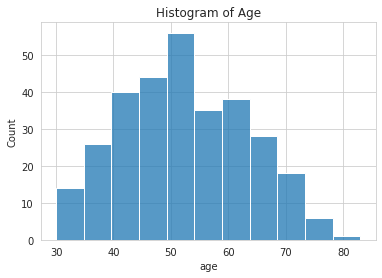

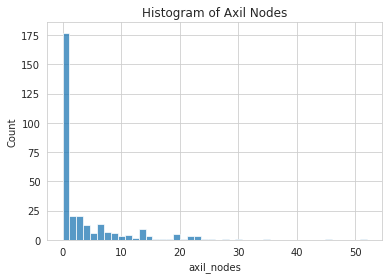

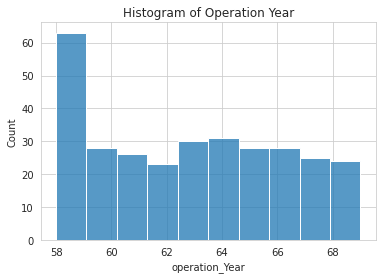

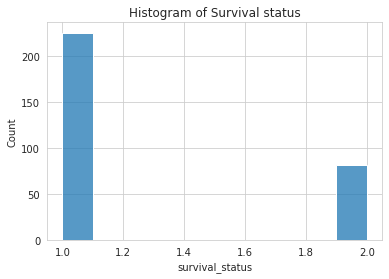

In [ ]:
print("Ditributions of all features")
sns.set_style('whitegrid')
sns.histplot(x = df['age'])
plt.title("Histogram of Age")
plt.show()
sns.histplot(x = df['axil_nodes'])
plt.title("Histogram of Axil Nodes")
plt.show()
sns.histplot(x = df['operation_Year'])
plt.title("Histogram of Operation Year")
plt.show()
sns.histplot(x = df['survival_status'])
plt.title("Histogram of Survival status")
plt.show()

**Observation**
- Age is Uniformly distributed
- Axil Nodes data is left skewed
- There are more patients in the year 1958-59 then in any other years
- About 70 percent of patients survived

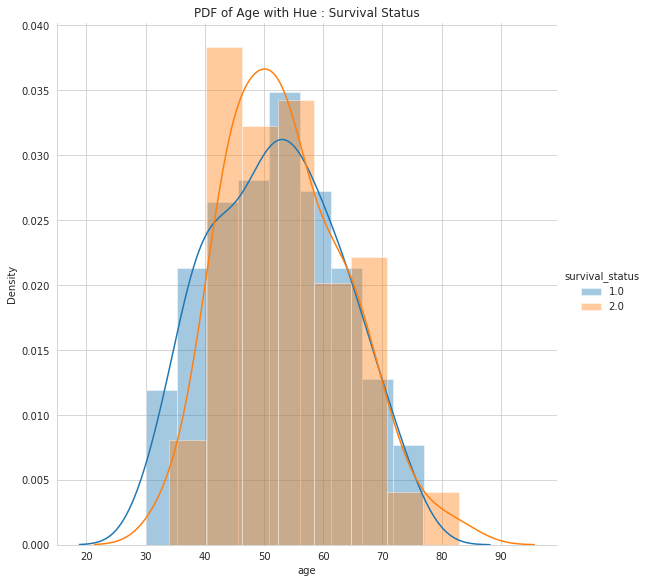

In [ ]:
sns.FacetGrid(data = df, hue = 'survival_status', size = 8).map(sns.distplot, 'age').add_legend()
plt.title("PDF of Age with Hue : Survival Status")
plt.show()

**Observation** 

Age does not have much effect on survival rate


Text(0.5, 1.0, 'PDF of Axil_Nodes with Hue : Survival Status')

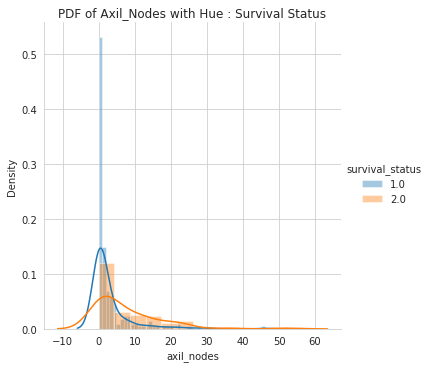

In [ ]:
sns.FacetGrid(data = df, hue = 'survival_status', size = 5).map(sns.distplot, 'axil_nodes').add_legend()
plt.title("PDF of Axil_Nodes with Hue : Survival Status")

**Observation**

When the number of axil nodes are low the chances of survival are more 

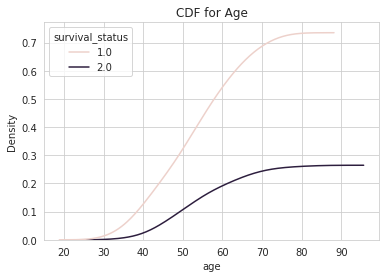

Text(0.5, 1.0, 'CDF for Axil_Nodes')

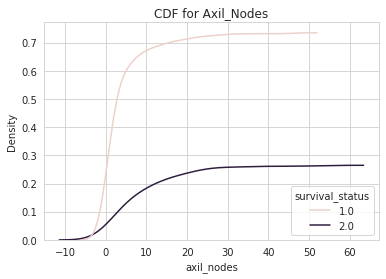

In [ ]:
sns.kdeplot(data = df, x = 'age', hue = 'survival_status', cumulative = True) #CDF
plt.title("CDF for Age")
plt.show()
sns.kdeplot(data = df, x = 'axil_nodes', hue = 'survival_status', cumulative = True)
plt.title("CDF for Axil_Nodes")

In [ ]:
# PDF and CDF of features
def pdf_cdf(feature):
    count, bins  = np.histogram(df.loc[df['survival_status'] == 1.0][feature], bins = 10)
    plt.plot(bins[1:], count/sum(count), label = "PDF for Survivors") #PDF
    plt.plot(bins[1:], np.cumsum(count/sum(count)), label = "CDF for Survivors")

    count, bins  = np.histogram(df.loc[df['survival_status'] == 2.0][feature], bins = 10)
    plt.plot(bins[1:], count/sum(count), label = "PDF for Demised") #PDF
    plt.plot(bins[1:], np.cumsum(count/sum(count)), label = "CDF for Demised")

    plt.xlabel(feature); plt.ylabel("Probability"); plt.title("CDF and PDF of {}".format(feature))
    plt.legend()
    plt.show()

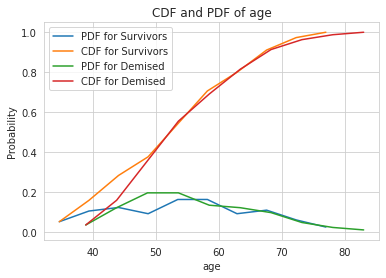

<Figure size 648x504 with 0 Axes>

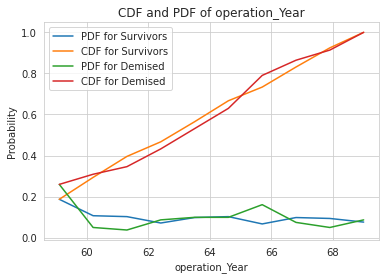

<Figure size 648x504 with 0 Axes>

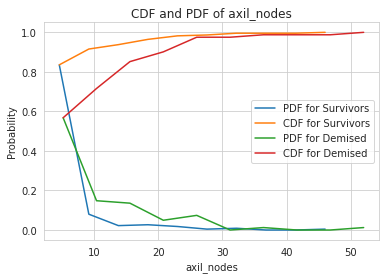

<Figure size 648x504 with 0 Axes>

In [ ]:
pdf_cdf('age')
pdf_cdf('operation_Year')
pdf_cdf('axil_nodes')

**Observation**


*   Almost 80 percent of survivors had less than 4 axil nodes
*   Almost 40 percent of demised had more than 4 axil nodes

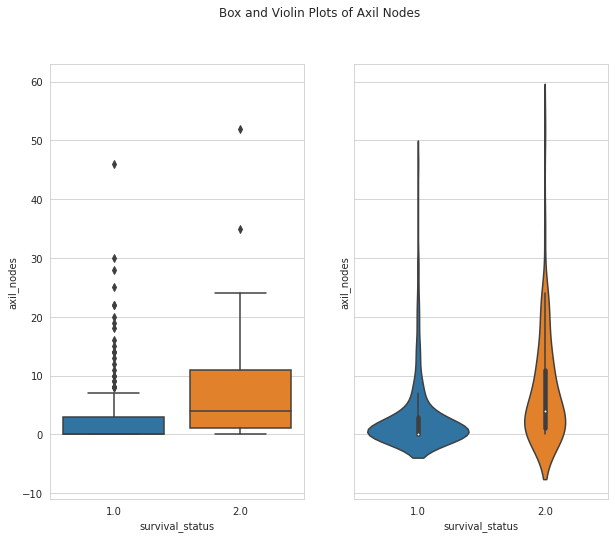

In [ ]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 8))
fig.suptitle("Box and Violin Plots of Axil Nodes")
sns.boxplot(data = df, x = 'survival_status', y = 'axil_nodes', ax = axes[0])
sns.violinplot(data = df, x= 'survival_status', y = 'axil_nodes',ax = axes[1])

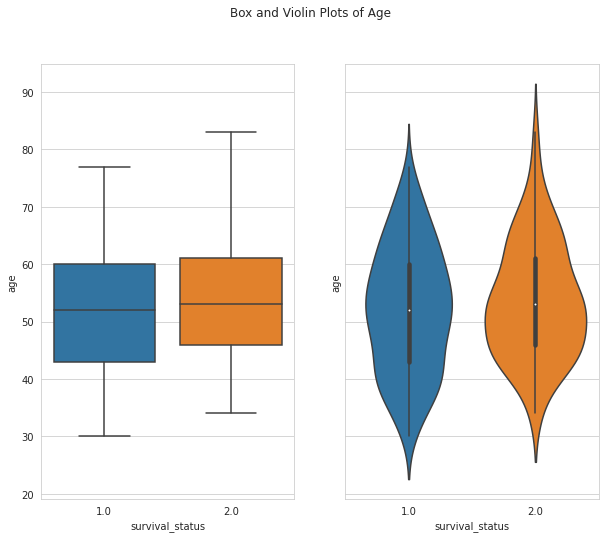

In [ ]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 8))
fig.suptitle("Box and Violin Plots of Age")
sns.boxplot(data = df, x = 'survival_status', y = 'age', ax = axes[0])
sns.violinplot(data = df, x= 'survival_status', y = 'age',ax = axes[1])

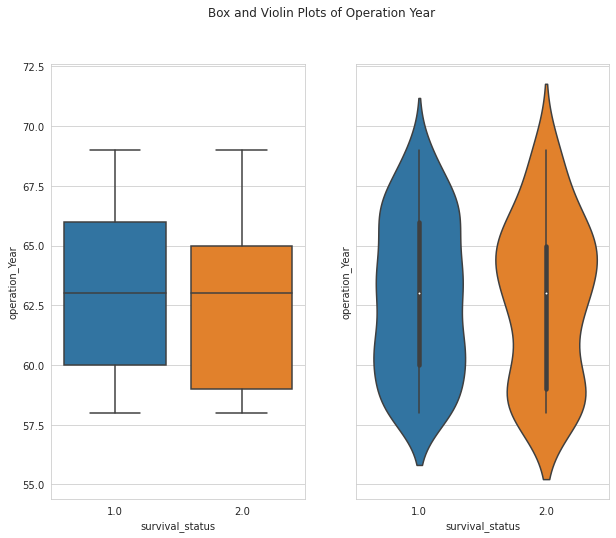

In [ ]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 8))
fig.suptitle("Box and Violin Plots of Operation Year")
sns.boxplot(data = df, x = 'survival_status', y = 'operation_Year', ax = axes[0])
sns.violinplot(data = df, x= 'survival_status', y = 'operation_Year',ax = axes[1])

**Observations**

- We have a lot of outliers for axil nodes
- 75 percent of survivors have less than 4 Nodes
- Almost 75 percent of demised had less than 10 Nodes
- Patients after year 1965 had slightly higher chances of survival
- Patients before year 1960 had slightly lower chances of survival

Text(0.5, 1.0, 'Survivors per Demise for Axil Nodes')

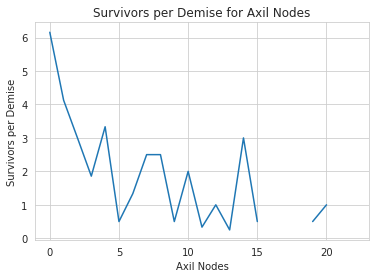

In [ ]:
plt.plot(ratio_axil, '-')
plt.xlabel("Axil Nodes")
plt.ylabel("Survivors per Demise")
plt.title("Survivors per Demise for Axil Nodes")

**Observation**

Number of survivors per demised decreses with increase in axil nodes

### 1.4 Performing Bivariate analysis - Plotting 2D Scatter plots and Pair plots


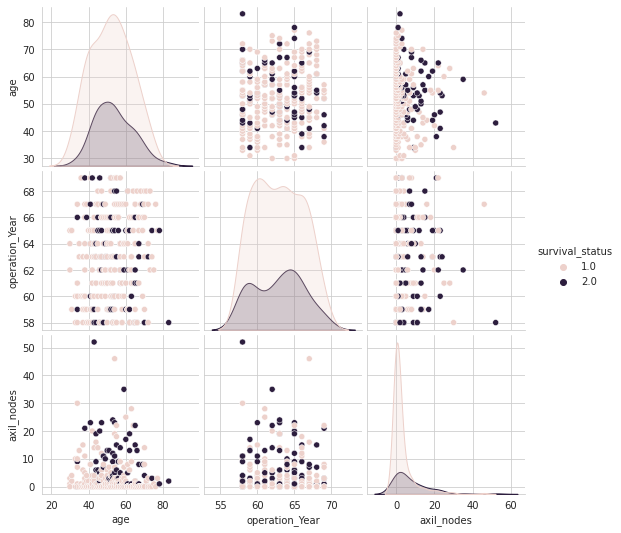

In [ ]:
sns.pairplot(data = df, hue = 'survival_status')

**Observation**

The data looks inseparable, however as seen before there are more survivors when there are less axil nodes, age and operation_Year do not seem to be of much help in classifying the data

### 1.5 Summarizing our final conclusions of the Exploration


## Overall Conclusion

### Non Graphical Observations
---

1.   There are 306 data points
2.   There are no null values in our dataset
3.   We have three input variables age, operation_year, axil_nodes
4.   Output Label :    
        *   1 : Survived more than 5 years : 225 (74%)
        *   2 : Survived less than 5 years : 81 (26%)
5.   Our dataset is *imbalanced*
6.   75 percent of patients have less than 4 Axil nodes
7.   We have data of patients between age 30-83 with an average age of 52 

---

### Univariate Analysis Observations
---
- Age is Uniformly distributed
- Axil Nodes data is left skewed
- There are more patients in the year 1958-59 then in any other years
- About 70 percent of patients survived


- Age does not have much effect on survival rate


*   Almost 80 percent of survivors had less than 4 axil nodes
*   Almost 40 percent of demised had more than 4 axil nodes
- We have a lot of outliers for axil nodes


- 75 percent of survivors have less than 4 Nodes
- Almost 75 percent of demised had less than 10 Nodes
- Patients after year 1965 had slightly higher chances of survival
- Patients before year 1960 had slightly lower chances of survival

---

### Multivariate Analysis Observation(Scatter Plot/Pair Plot)
---

- The data looks inseparable, however as seen before there are more survivors when there are less axil nodes, age and operation_Year do not seem to be of much help in classifying the data
---





